## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft's Film Analysis Project

**Author**: *Gibson Wanjau*

# Overview

This project is an analysis os the film industry aimed at giving credible information to a new player in the industry. My role as a data scientist is to give a credible feedback to Microsoft while assesing the highly competitive industry. while a determining which films perfom best at the box office .We will use five datasets to compare the players attributes and revenue margins.From the analysis we intend to haelp microsoft know the profit margins ,the rival competitors the content thyld like to focus on and the teams they can work together.

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.I have been charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

first have a draw attention to the common films and content, the audience and also the profit margins.

since Microsoft is a newcommer in the industry will give them a detailed outline of where they need to set theire foot first to gain.will alsi give recomendation on some of the best cxecutives in the industry.

Data Understanding

# Data Understanding¶

The data available is from the following sources: Box Office Mojo. IMDB. Rotten Tomatoes. TheMovieDB. The Numbers Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.

In [1]:
# importing the apropriate libraries
import csv
import pandas as pd
import zippedData
import sqlite3 as sql
import matplotlib.pyplot as plt

%matplotlib inline

# cheking tha data available for out project

In [2]:
!cd zippedData

In [3]:
!ls

awesome.gif	 LICENSE.md	      README.md      zippedData
CONTRIBUTING.md  movie_data_erd.jpeg  student.ipynb


In [4]:
!ls zippedData/

bom.movie_gross.csv.gz	rt.movie_info.tsv.gz  tmdb.movies.csv.gz
im.db.zip		rt.reviews.tsv.gz     tn.movie_budgets.csv.gz


# importing : The Number Movie Budget Data

In [5]:
#import tn.movie_budgets.csv.gz dataset from our data folder
TN_data = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
display(TN_data.info())
TN_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# importing : The Movie Database (TMDB)

In [6]:

#importing tmdb.movies.csv.gz dataset from our data folder
#importing tmdb.movies.csv.gz dataset from our data folder
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz")
display(TMDB_data.info())
TMDB_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# importing:Rotten Tomato Movie Info.


In [8]:
#importing 'rt.movie_info.tsv' from our dataset
RT_info_data = pd.read_table('zippedData/rt.movie_info.tsv.gz')
RT_info_data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
top_directors=RT_info_data['director'].value_counts().head(10)
top_directors

Steven Spielberg    10
Clint Eastwood       8
William Friedkin     4
Curtis Hanson        4
William Beaudine     4
Bruce Beresford      4
Ridley Scott         4
Yimou Zhang          4
Alfred Hitchcock     4
Jim Jarmusch         4
Name: director, dtype: int64

# Data Analysis

# cleaning:The Numbers Film Budget

# Step1:Dropping Unnecesary Columns

here we drob the columns that dont add value to our objective , since the we are doing our resesrch on a global perspective it is not relevant to have a domestic gross column.also the id column is not relevant.

In [10]:

#dropping unnecesary columns the id and domestic gross
TN_data.drop(['id',"domestic_gross"], axis=1, inplace=True)
TN_data

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...,...
5777,"Dec 31, 2018",Red 11,"$7,000",$0
5778,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


# Step2:Cleaning Nmerical Columns

By creating the return on investment column we can draw insight on profit margins,this is an essential element in the future succes of our research. this will require the product budget as well as the global gross columns to calculate the ROI. Due to this we have to clean up the two columns to codduct the mathermatical operation.



In [12]:
#checking the wildwide gross column
TN_data['worldwide_gross'].value_counts()

$0             367
$8,000,000       9
$2,000,000       6
$7,000,000       6
$4,000,000       4
              ... 
$39,498,360      1
$94,875,000      1
$77,593,167      1
$36,299,670      1
$181,041         1
Name: worldwide_gross, Length: 5356, dtype: int64

In [13]:
TN_data["production_budget"].value_counts()

$20,000,000    231
$10,000,000    212
$30,000,000    177
$15,000,000    173
$25,000,000    171
              ... 
$13,900,000      1
$14,200,000      1
$14,400,000      1
$14,600,000      1
$1,100           1
Name: production_budget, Length: 509, dtype: int64

from the data undetstandin in the above tests it is cleat that there is a placeholder in th worldwide_gross column .It does not add up on a film having a 0 profit afer it has been released. we can isolate the data for further observations and final decision.

In [14]:
#isolating rows with 0 values in the 'worldwide_gross' column
TN_data.loc[TN_data['worldwide_gross'] == '$0']

,release_date,movie,production_budget,worldwide_gross
194,"Dec 31, 2020",Moonfall,"$150,000,000",$0
479,"Dec 13, 2017",Bright,"$90,000,000",$0
480,"Dec 31, 2019",Army of the Dead,"$90,000,000",$0
535,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0
670,"Aug 30, 2019",PLAYMOBIL,"$75,000,000",$0
...,...,...,...,...
5761,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0
5764,"Dec 31, 2007",Tin Can Man,"$12,000",$0
5771,"May 19, 2015",Family Motocross,"$10,000",$0
5777,"Dec 31, 2018",Red 11,"$7,000",$0


from the range of placeholder data in the worldwide column we can observe that some if the films are old release which is less likely li give ni profit . since the data is a very small percentage of our entire dataset we consider dropping the rows.

In [15]:
#dropping all the rows with value '0' in the worldwide_gross column
TN_data=TN_data.drop(TN_data[TN_data['worldwide_gross'] == '$0'].index)

In [16]:
#using the strip method to convert values into intagers
def remove_labels(df, column):
    df[column] = df[column].apply(lambda x: x.strip('$').replace(',',''))
    df[column] = df[column].astype(int)
    
remove_labels(TN_data, 'production_budget')
remove_labels(TN_data, 'worldwide_gross')
TN_data.head()

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


now our data is ready for numerical analysis

# Step3: Creating a new ROI column

Returns of an investment is a essential element in business. It gives a more elaborate image in the bueiness asessment.The return of an investment will give a rough estimate of the kinde of financial imput expected in the investment, as we asses this will check for other elements correlated to returns ie budget.



In [18]:
#create a new column and add our ROI calculations name it worldwide_roi
TN_data['worldwide_roi(%)'] = TN_data['worldwide_gross']\
                            /TN_data['production_budget'] * 100

#testing our new column
display(TN_data['worldwide_roi(%)'])
TN_data.head()

0         653.257713
1         254.667286
2          42.789243
3         424.384139
4         415.369636
            ...     
5775     1023.485714
5776       12.857143
5778     4008.250000
5779       26.760000
5781    16458.272727
Name: worldwide_roi(%), Length: 5415, dtype: float64

,release_date,movie,production_budget,worldwide_gross,worldwide_roi(%)
0,"Dec 18, 2009",Avatar,425000000,2776345279,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,424.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,415.369636


the data set has is now refined and can be used for analysis

# Cleaning:The Movie Databade(TMDB)

In [20]:
# Genre and Popularity measurements were found in the TMDB Database
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
TMDB_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:

#checking for data info in our "zippedData/tmdb.movies.csv.gz" dataset
TMDB_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


the table has no nun values but we need to make a deeper observation on placeholders. also all the columns are in their correct data types.

# step1:Drop unnecesary columns


In [22]:
#Droping unnecesary columns
TMDB_data.drop(['vote_count', 'vote_average'], axis=1, inplace=True)
TMDB_data

,genre_ids,id,original_language,original_title,popularity,release_date,title
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception
...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made


# Step 2: Categorizing genres¶

We now need to classify each of the various genres and arrange them in order to find the primary genre,secondary genre and tertiary genre

In [23]:
# split and separate the genres from our dataframe
split_genre = TMDB_data['genre_ids'].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")
genre_data = split_genre.to_list()
genre_names = ['Genre1', "Genre2", "Genre3", "Genre4", "Genre5", "Genre6", "Genre7"]
#A new dataframe to hold genres
genre_df = pd.DataFrame(genre_data, columns=genre_names)
#Dropping extra genre columns in genre_df
genre_df.drop([ "Genre2", "Genre3","Genre4", "Genre5", "Genre6", "Genre7"], axis=1,inplace=True)
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre1  26517 non-null  object
dtypes: object(1)
memory usage: 207.3+ KB


/tmp/ipykernel_18784/1948068117.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  split_genre = TMDB_data['genre_ids'].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")


In [24]:
# concatenate into one column and drop null rows
#genre_pull = [genre_df['Genre1'], genre_df['Genre2'], genre_df['Genre3']]
#singular_genre_total = pd.concat(genre_pull)
genre_df.dropna(inplace=True)
genre_df.describe()

,Genre1
count,26517
unique,20
top,18
freq,4923


We now need to classify each of the various genres and arrange them in order to find the primary genre,secondary genre and tertiary genre

In [25]:
# add split genre columns back into data frame
TMDB_data['Genre'] = genre_df['Genre1']


In [26]:
TMDB_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,Genre
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,12
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,14
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,12
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,16
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,28
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,27
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,18
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,14
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,10751


In [27]:
TMDB_data['Genre']

0           12
1           14
2           12
3           16
4           28
         ...  
26512       27
26513       18
26514       14
26515    10751
26516       53
Name: Genre, Length: 26517, dtype: object

Now, let's isolate and separate the columns: [genre_ids] representing multiple values for easier manipulation.

# Rotten Tomato

In [28]:
RT_info_data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


# Directors

In [29]:
top_directors=RT_info_data['director'].value_counts().head(10)
top_directors

Steven Spielberg    10
Clint Eastwood       8
William Friedkin     4
Curtis Hanson        4
William Beaudine     4
Bruce Beresford      4
Ridley Scott         4
Yimou Zhang          4
Alfred Hitchcock     4
Jim Jarmusch         4
Name: director, dtype: int64

Text(0.5, 0, 'Frequency in Top IMDB Films')

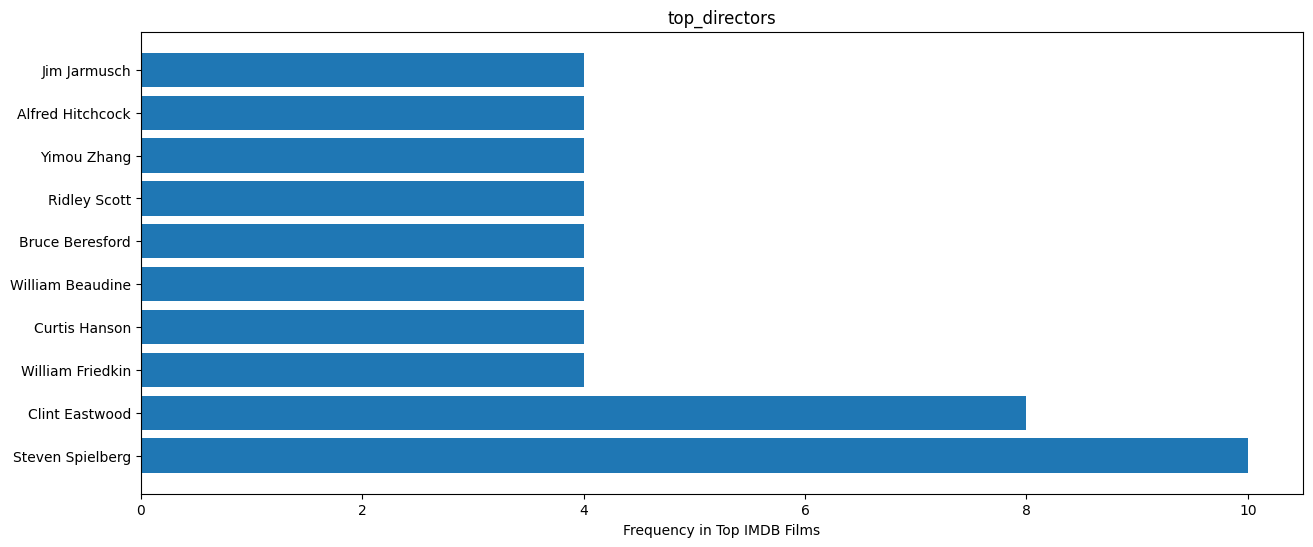

In [30]:
ig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
top_directors=RT_info_data['director'].value_counts().head(10) 
# get x and y data 
points = top_directors.index 
frequency = top_directors.values 
# create bar chart 
ax.barh(points, frequency) 
# set title and labels 
ax.set_title('top_directors') 
ax.set_xlabel('Frequency in Top IMDB Films')

# Writers

In [31]:
top_writers=RT_info_data['writer'].value_counts().head(10)
top_directors

Steven Spielberg    10
Clint Eastwood       8
William Friedkin     4
Curtis Hanson        4
William Beaudine     4
Bruce Beresford      4
Ridley Scott         4
Yimou Zhang          4
Alfred Hitchcock     4
Jim Jarmusch         4
Name: director, dtype: int64

Text(0.5, 0, 'Frequency in Top IMDB Films')

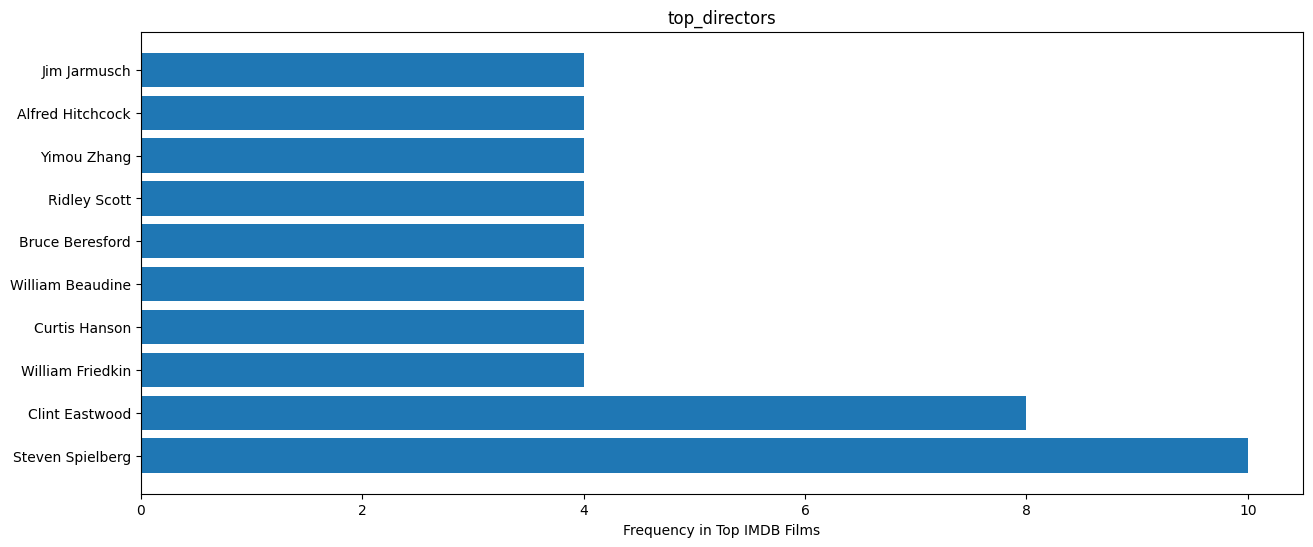

In [32]:
ig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
top_directors=RT_info_data['director'].value_counts().head(10) 
# get x and y data 
points = top_directors.index 
frequency = top_directors.values 
# create bar chart 
ax.barh(points, frequency) 
# set title and labels 
ax.set_title('top_directors') 
ax.set_xlabel('Frequency in Top IMDB Films')

# What is the correlation between popularity and release date?

In [33]:
# Set the data we used for the popularity and month released to determine which month was the most popular month for movies on average.
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz", parse_dates = ['release_date'])

In [34]:
# We used this data to see the popularity and release date as well as how exactly the vote count and average was broken down.
TMDB_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [35]:
type(TMDB_data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
# Sorted values in order from highest to lowest in regards to vote count
TMDB_data.sort_values('vote_count', ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
...,...,...,...,...,...,...,...,...,...,...
14071,14071,[],312155,en,Merely Players,0.600,2014-12-16,Merely Players,3.0,1
14075,14075,[],287781,en,24 Hours,0.600,2014-07-25,24 Hours,3.0,1
14078,14078,[27],274257,en,The First Wave,0.600,2014-01-10,The First Wave,3.0,1
14087,14087,[35],365539,en,Cinema Purgatorio,0.600,2014-06-01,Cinema Purgatorio,2.5,1


In [37]:

# Targeted the month column and more specifically the month column so that we could determine what month would be the most and least popular month to release a movie.
TMDB_data['month'] = TMDB_data['release_date'].dt.month

In [38]:
# Set the average popularity per month in order from highest to lowest
popularity_by_month = TMDB_data.groupby('month')['popularity'].mean().sort_values(ascending=False)

In [39]:
popularity_by_month = popularity_by_month.reset_index()

In [40]:
popularity_by_month = popularity_by_month.sort_values("month")

In [41]:
# Set the x label months by the words of the months instead of the numbers. 
month_tag = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

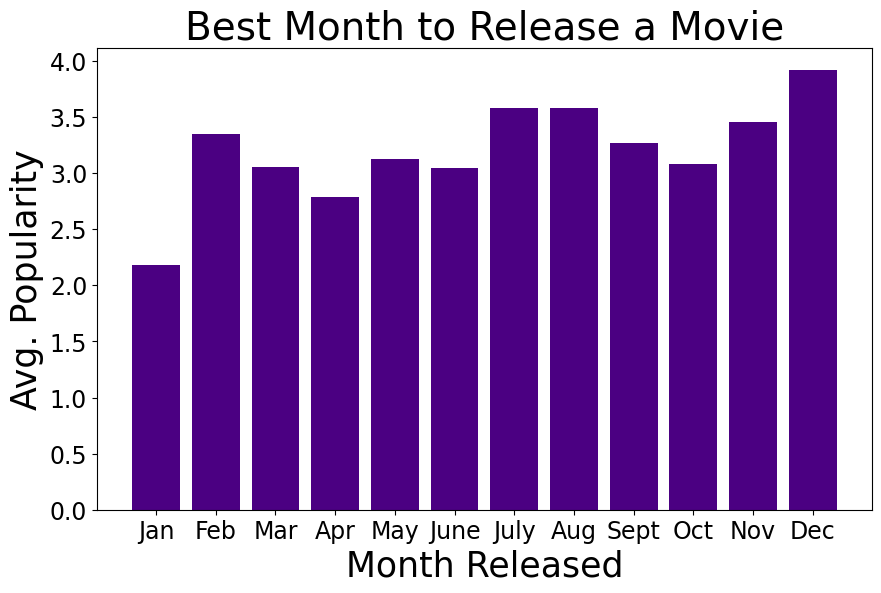

In [42]:
# Set the bar plot
my_plot_fig, my_plot_ax = plt.subplots(figsize=(10,6))
# Used month and popularity as the targeted columns and the color as green.
my_plot_ax.bar(popularity_by_month['month'],popularity_by_month['popularity'], color = 'indigo')
# Set fontsizes and labels for the axes and title.
my_plot_ax.set_title(('Best Month to Release a Movie'), fontsize = 28)
my_plot_ax.set_ylabel(('Avg. Popularity'), fontsize = 25)
my_plot_ax.set_xlabel(('Month Released'), fontsize = 25)
plt.xticks(ticks = popularity_by_month['month'], labels = month_tag, fontsize=17)
plt.yticks(fontsize=17)


my_plot_fig.patch.set_facecolor('white')
my_plot_fig.patch.set_alpha(1)

my_plot_fig.savefig('popularity_by_month.png', facecolor=my_plot_fig.get_facecolor(), edgecolor='none')

# what geners are most common and how porpular are they?

In [43]:
# Genre and Popularity measurements were found in the TMDB Database
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [44]:
# We used this data to see the popularity and release date as well as how exactly the vote count and average was broken down.
TMDB_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [45]:
# In order to utilize the genre information, it needed split apart and exploded.
TMDB_data["genre_ids"] = TMDB_data["genre_ids"].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

/tmp/ipykernel_18784/2782464549.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TMDB_data["genre_ids"] = TMDB_data["genre_ids"].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")


In [46]:
TMDB_genre = TMDB_data.explode(column="genre_ids")

In [47]:
# Then we found the avg popularity for each genre and returning a list of the top 10 most popular genres 
# over the 8-year span. 
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)
genres
genres.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 12 to 16
Series name: popularity
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


In [48]:
#  Using the code on the TMDB website, we converted the top 10 genres from numeric code to name associated with the number. 
lst_of_genres = ['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction', 'Thriller', 'Mystery', 'Family', 'Animation'] 

In [49]:
genres.index = lst_of_genres
genres.index

Index(['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction',
       'Thriller', 'Mystery', 'Family', 'Animation'],
      dtype='object')

NameError: name 'fig' is not defined

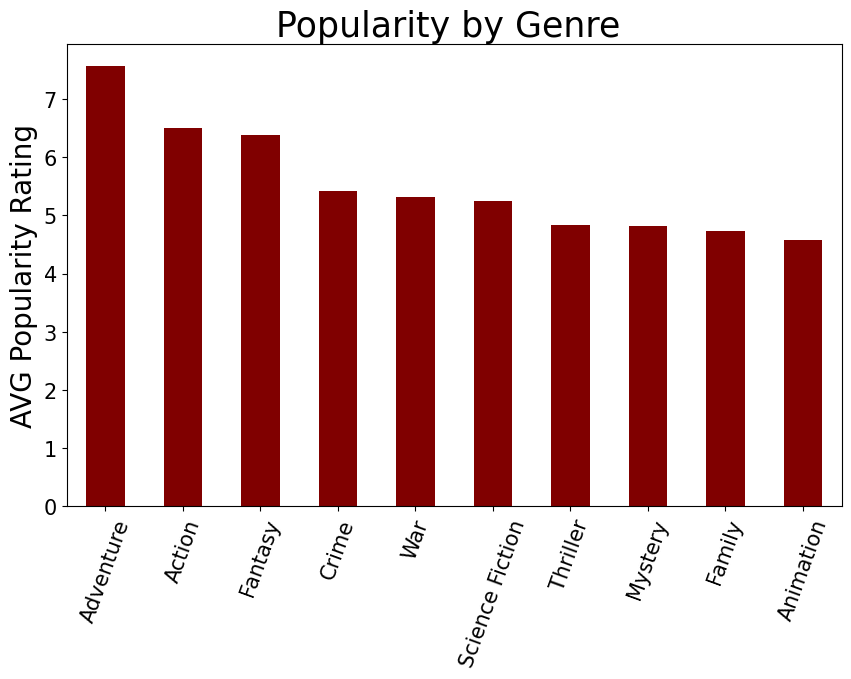

In [50]:
# We used a Histogram to visualize the popularity of the top ten genres.
x = genres.index
y = genres.values
plt.figure(figsize=(10,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Popularity by Genre ", fontsize=25)
plt.ylabel("AVG Popularity Rating", fontsize=20)
ax= genres.plot.bar(x=x, y=y, rot=70 ,color = 'maroon')

fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

plt.savefig('popularity_by_genre.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches="tight")

# Production Budget and Worldwide Gross Correlation


In [51]:
x = list(TN_data['worldwide_gross'].values)
y = list(TN_data['production_budget'].values)

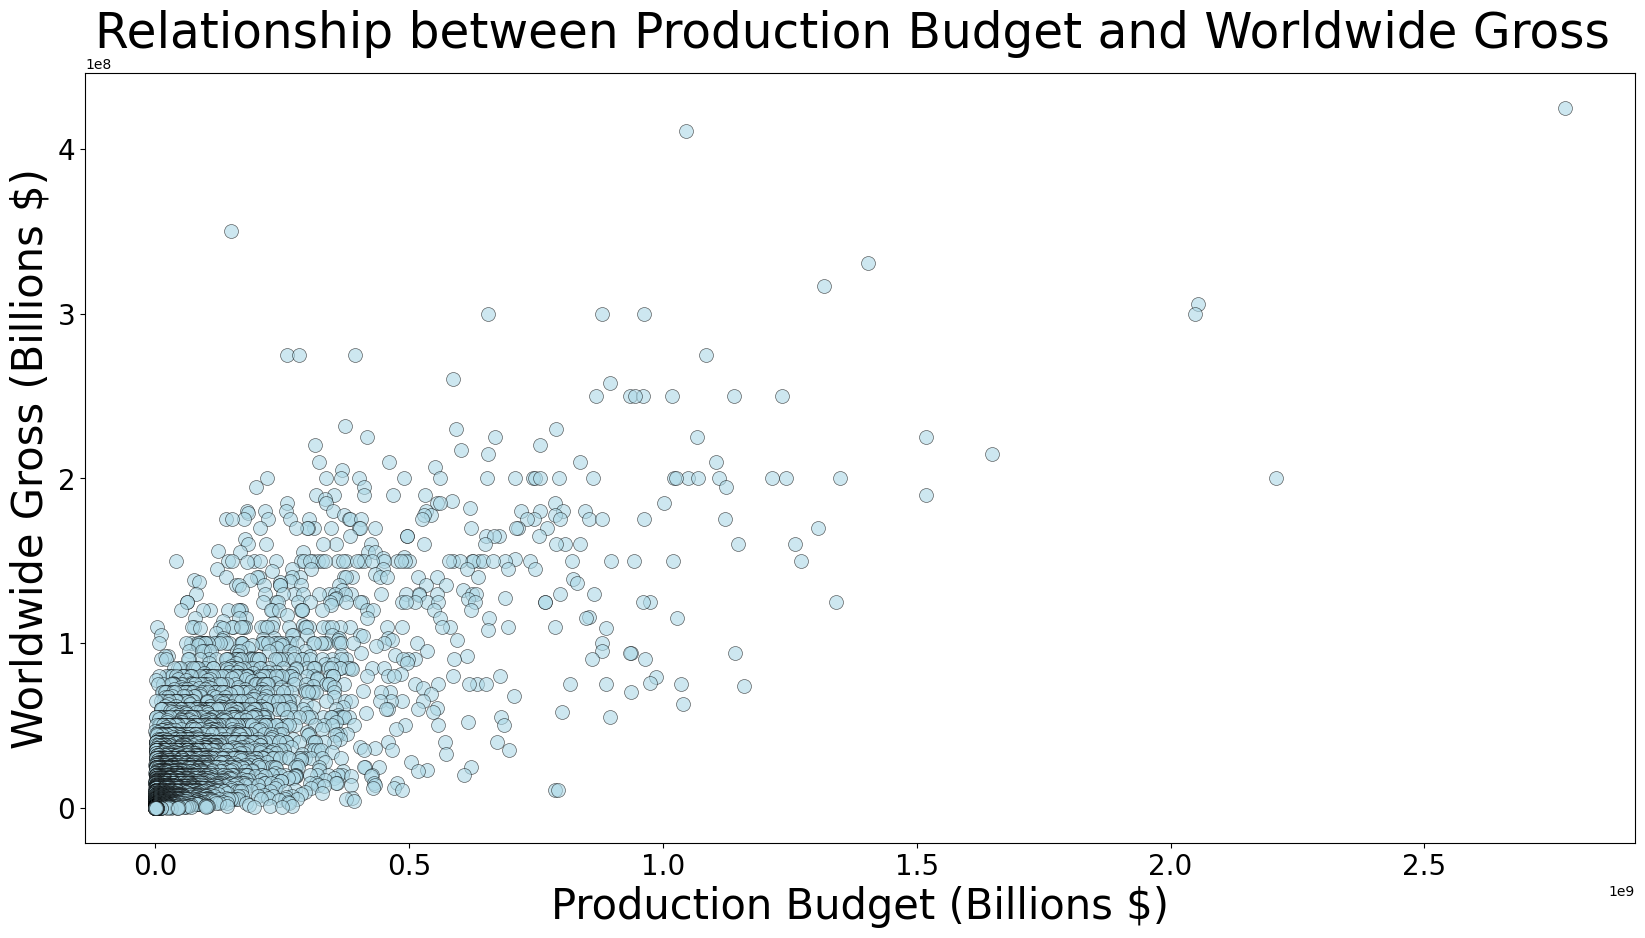

In [52]:
# Set x and y axes with the above data as values thata re displayed below.
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(TN_data['worldwide_gross'],TN_data['production_budget'], color='lightblue', 
                        alpha=.6, edgecolor='black', linewidth=.5, s=100)

ax.set_title('Relationship between Production Budget and Worldwide Gross ', fontsize = 35)
ax.set_ylabel('Worldwide Gross (Billions $)', fontsize = 30)
ax.set_xlabel('Production Budget (Billions $)', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

;


fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

fig.savefig('production_budget_worldwide_gross_correlation.png', facecolor=fig.get_facecolor(), edgecolor='none')

# what is the correlation between production budget and rerurn on investment

In [53]:
y = list(TN_data['worldwide_roi(%)'].values)
x = list(TN_data['production_budget'].values)

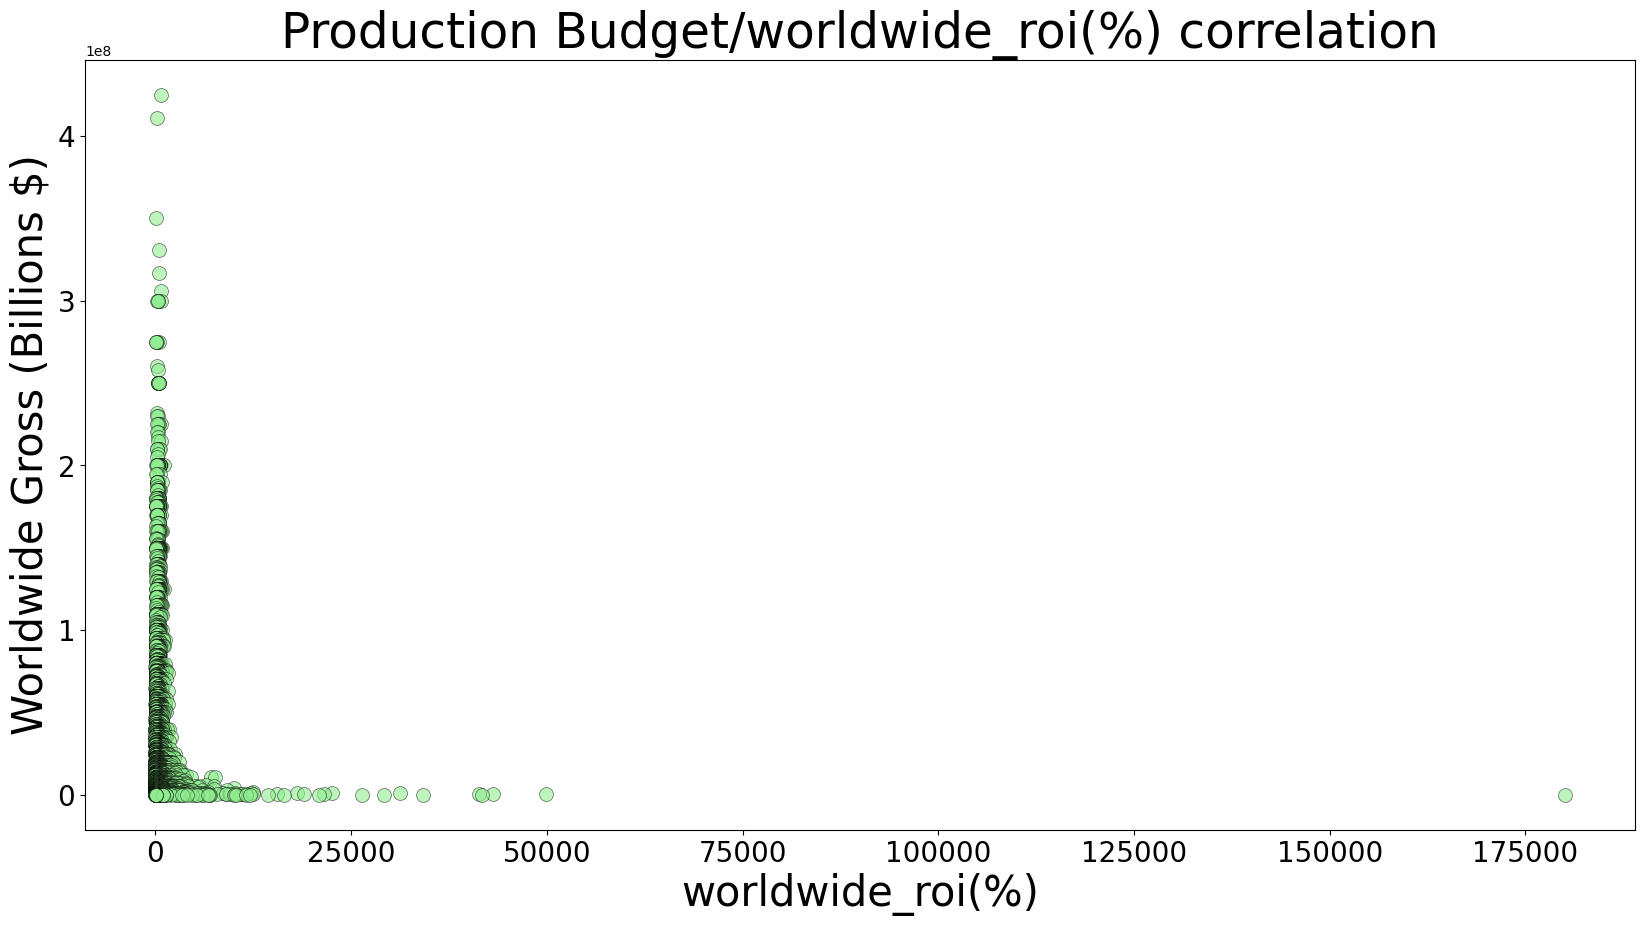

In [54]:
# Set x and y axes with the above data as values thata re displayed below.
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(TN_data['worldwide_roi(%)'],TN_data['production_budget'], color='lightgreen', 
                        alpha=.6, edgecolor='black', linewidth=.5, s=100)

ax.set_title('Production Budget/worldwide_roi(%) correlation', fontsize = 35)
ax.set_ylabel('Worldwide Gross (Billions $)', fontsize = 30)
ax.set_xlabel('worldwide_roi(%)', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

;


fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

fig.savefig('production_budget_worldwide_roi(%)_correlation.png', facecolor=fig.get_facecolor(), edgecolor='none')